In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import json
import numpy as np

In [25]:
results = {
    "CodeBERT": {
        "size": 125/1000,
        "type": "code",
        "architect": "encoder",
        "f1": 43.37
    },
    "UniXCoder": {
        "size": 125/1000,
        "type": "code",
        "architect": "encoder",
        "f1": 42.58
    },
    "GraphCodeBERT ": {
        "size": 125/1000,
        "type": "code",
        "architect": "encoder",
        "f1": 44.21
    },
    "RoBERTa": {
        "size": 125/1000,
        "type": "text",
        "architect": "encoder",
        "f1": 38.22
    },
    "ALBERT": {
        "size": 11.8/1000,
        "type": "text",
        "architect": "encoder",
        "f1": 41.99
    },
    "PLBART": {
        "size": 140/1000,
        "type": "text",
        "architect": "encoder-decoder",
        "f1": 39.90
    },
    "Codet5": {
        "size": 220/1000,
        "type": "text",
        "architect": "encoder-decoder",
        "f1": 35.41
    },
    "Codet5+": {
        "size": 220/1000,
        "type": "text",
        "architect": "encoder-decoder",
        "f1": 41.96
    },
    "TinyLlama": {
        "size": 1.03,
        "type": "text",
        "architect": "decoder",
        "f1": 40.05
    },
    "DeepSeek-Coder": {
        "size": 1.28,
        "type": "code",
        "architect": "decoder",
        "f1": 46.19
    },
    "OpenCodeInterpreter": {
        "size": 1.35,
        "type": "code",
        "architect": "decoder",
        "f1": 41.76
    },
    "phi-2": {
        "size": 2.78,
        "type": "text",
        "architect": "decoder",
        "f1": 41.57
    },
    "starcoder2": {
        "size": 3.03,
        "type": "code",
        "architect": "decoder",
        "f1": 41.77
    },
    "CodeLlama": {
        "size": 6.74,
        "type": "code",
        "architect": "decoder",
        "f1": 38.16
    },
    "Magicoder": {
        "size": 6.74,
        "type": "code",
        "architect": "decoder",
        "f1": 42.49
    },

}

architectures = ["encoder", "encoder-decoder", "decoder"]

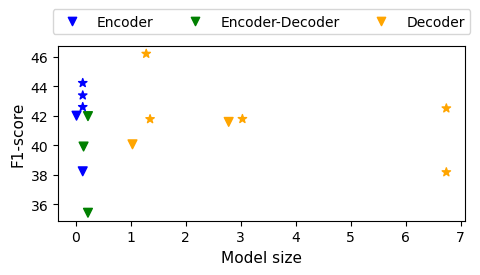

In [35]:

plt.rcParams["figure.figsize"] = (5,3)
fontsize = 11
colormap = ListedColormap(["blue", "green", "orange"])


x = []
y = []
c = []

x_ = []
y_ = []
c_ = []

for model in results:
    if results[model]["type"] == "text":
        x.append(results[model]["size"])
        y.append(results[model]["f1"])


        c.append(architectures.index(results[model]["architect"]))
    else:
        x_.append(results[model]["size"])
        y_.append(results[model]["f1"])
        c_.append(architectures.index(results[model]["architect"]))

sc1 = plt.scatter(x=x,y=y,s=40, c=c, cmap=colormap, marker="v")
sc2 = plt.scatter(x=x_,y=y_,s=40, c=c_, cmap=colormap, marker="*")


plt.legend(handles=sc1.legend_elements()[0], labels= ["Encoder", "Encoder-Decoder", "Decoder"], loc='upper center', scatterpoints=1, ncol=3, bbox_to_anchor=(0.5, 1.25),
          fancybox=True,)

plt.ylabel('F1-score', fontsize = fontsize)
plt.xlabel('Model size', fontsize = fontsize)
plt.tight_layout()